In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import glob
from scipy.stats import binned_statistic, mode

from pltrollspot import spot_inspect

In [2]:
dbfiles = glob.glob('*10yrs.db')
dbfiles.sort()

Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'filter', 'night', 'fieldRA', 'observationStartMJD', 'fiveSigmaDepth'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'filter', 'night', 'fieldRA', 'observationStartMJD', 'fiveSigmaDepth'].
Found 2228716 visits
Running:  ['roll_mod2_sdf0_10mixed_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'filter', 'night', 'fieldRA', 'observationStartMJD', 'fiveSigmaDepth'].
Found 2034122 visits
Running:  ['rolling_nm_scale0_90_nslice2_fpw0_9_nrw1_0v1_7_10yrs_db_Pass_filter_observationStart

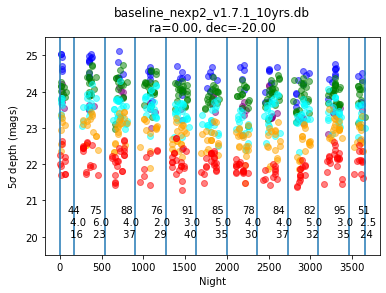

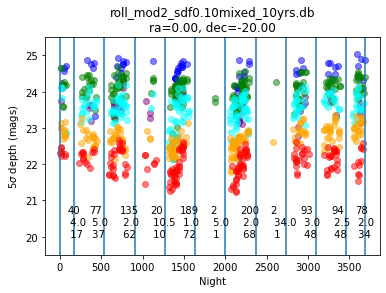

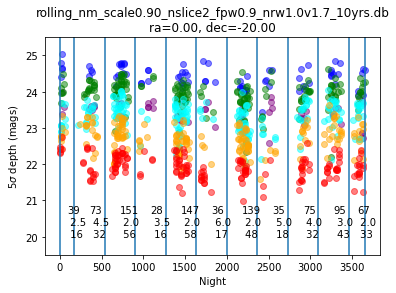

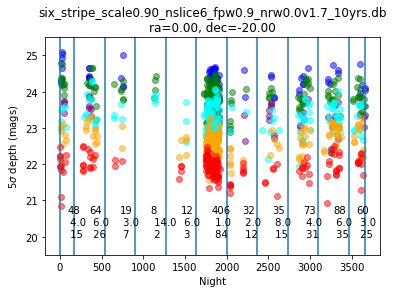

In [5]:
for filename in dbfiles:
    fig, ax = spot_inspect(filename, 0., -20.)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913.125000 and night < 1278.375000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 195449 visits
Running:  ['baseline_nexp2_v1_7_1_Count_filter_night_gt_913_125000_and_night_lt_1278_375000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913.125000 and night < 1278.375000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913.125000 and night < 1278.375000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 211991 visits
Running:  ['roll_mod2_sdf0_10mixed_Count_filter_night_gt_913_125000_and_night_lt_1278_375000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913.125000 and night < 1278.375000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913.125000 and night < 1278.375000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 194730 visits
Running:  ['rolling_nm_scale0_90_nslice2_fpw0_9_nrw1_0v1_7_Count_filter_night_gt_913_125000_and_night_lt_1278_375000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913.125000 and night < 1278.375000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 913.125000 and night < 1278.375000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 194340 visits
Running:  ['six_stripe_scale0_90_nslice6_fpw0_9_nrw0_0v1_7_Count_filter_night_gt_913_125000_and_night_lt_1278_375000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 913.125000 and night < 1278.375000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


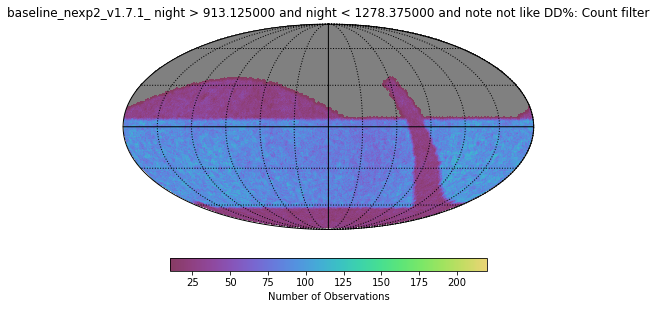

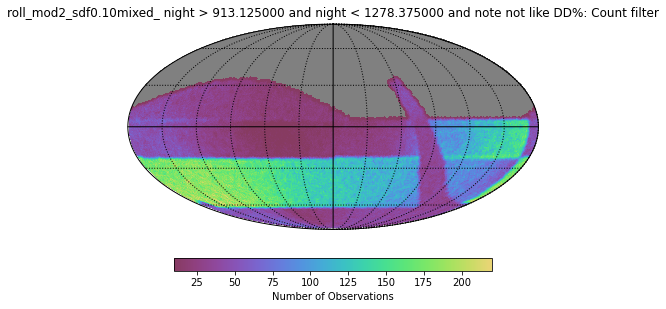

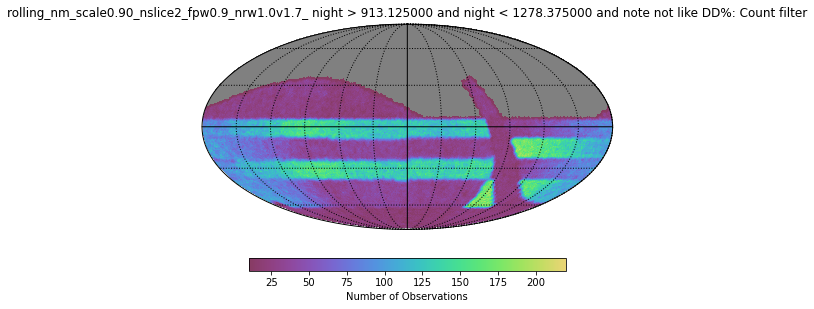

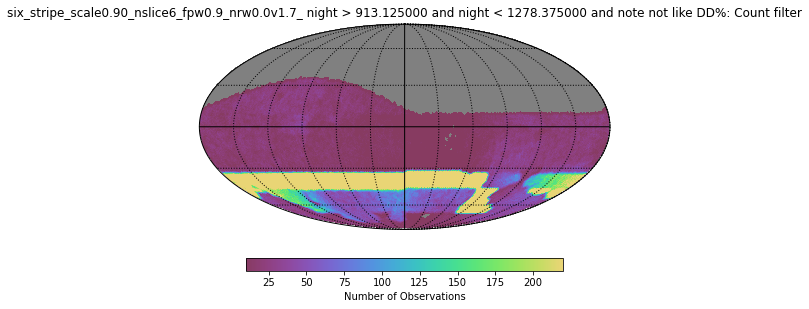

In [4]:
for filename in dbfiles:
    runname = filename.replace('10yrs.db', '')
    conn = db.OpsimDatabase(filename)
    outDir='temp'
    resultsDb = db.ResultsDb(outDir=outDir)

    bundleList = []
    
    sql = 'night > %f and night < %f and note not like "DD%%"' % ((365.25*2.5, 365.25*3.5) )
    metric = metrics.CountMetric('filter')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlabel': 'Number of Observations', 'colorMin': 10, 'colorMax': 220}
    plotFuncs = [plots.HealpixSkyMap()]
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 plotFuncs=plotFuncs,
                                                runName=runname))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)